# Lab 8
Name: Isaam Melo 

## Setup for SUSY Dataset

Use the SUSY dataset for the rest of this lab. Here is a basic setup.

In [1]:
# Our usual libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate

In [2]:
filename="C:/Users/meloi/Downloads/susy (1)/SUSY.csv.gz"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", 
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)

## Scikit-Learn

[Scikit-learn](http://scikit-learn.org) is a rich python library for data science, including machine learning. For example, we can build a Fisher Discriminant (aka Linear Discriminant Analysis, or LDA). 

### Exercise 1: Install Scikit-Learn

Follow the [Installation Instructions](https://scikit-learn.org/stable/install.html) and install `scikit-learn` in your environment.

### Exercise 2: Read About Classifiers

#### Part a
Scikit-learn offers an impressively comprehensive list of machine learning algorithms. Browse through [scikit-learn's documentation](https://scikit-learn.org/stable/index.html). You'll note the algorithms are organized into classification, regression, clustering, dimensionality reduction, model selection, and preprocessing. Browse through the list of [classification algorithms](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning). 

#### Part b
Note scikit-learn's documentation is rather comprehensive. The documentation on [linear models](https://scikit-learn.org/stable/modules/linear_model.html) shows how classification problems are setup. Read about the first few methods and try to comprehend the example codes. Skim the rest of the document.

#### Part c
Read through the [LDA Documentation](https://scikit-learn.org/stable/modules/lda_qda.html).


### Exercise 3: Training a Classifier

Lets' repeat what we did manually in the previous lab using scikit-learn. We'll use a LDA classifier, which we can instanciate as follows:

In [3]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

As discussed in the lecture, to properly formulate our problem, we'll have to:

* Define the inputs (X) vs outputs (Y)
* Designate training vs testing samples (in order to get a unbias assessment of the performance of Machine Learning algorithms)

for example, here we'll take use 4M events for training and the remainder for testing.

In [4]:
N_Train=4000000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]


We can train the classifier as follow:

In [5]:
Fisher.fit(X_Train,y_Train)

LinearDiscriminantAnalysis()

We can plot the output, comparing signal and background:

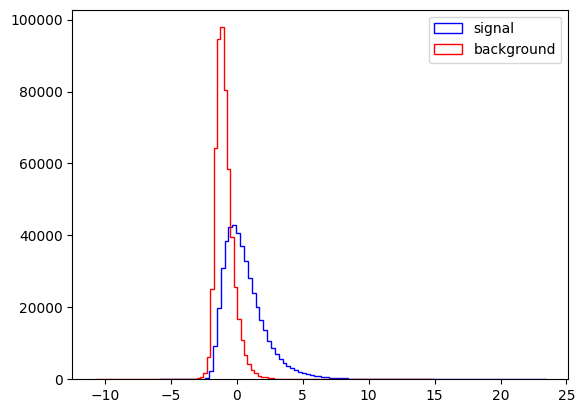

In [6]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

#### Part a

Compare ROC curves computed on the test versus training samples, in a single plot. Do you see a bias?

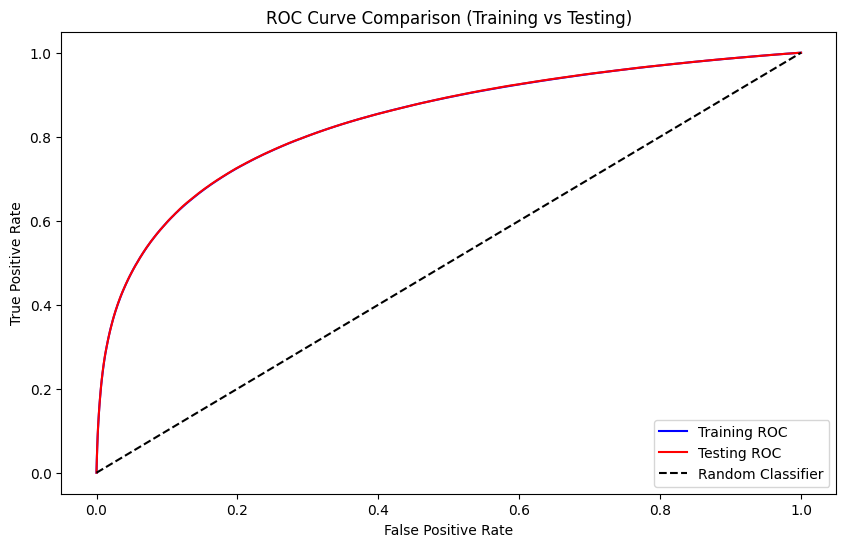

In [7]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

Fisher.fit(X_Train, y_Train)

y_train_pred=Fisher.decision_function(X_Train)
y_test_pred=Fisher.decision_function(X_Test)

fpr_train, tpr_train, _=metrics.roc_curve(y_Train, y_train_pred)
fpr_test, tpr_test, _=metrics.roc_curve(y_Test, y_test_pred)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, label="Training ROC", color="blue")
plt.plot(fpr_test, tpr_test, label="Testing ROC", color="red")
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (Training vs Testing)')
plt.legend(loc='lower right')
plt.show()

#### Part b

Train the Fisher performance of using the raw, features, and raw+features as input. Compare the performance one a single plot. 

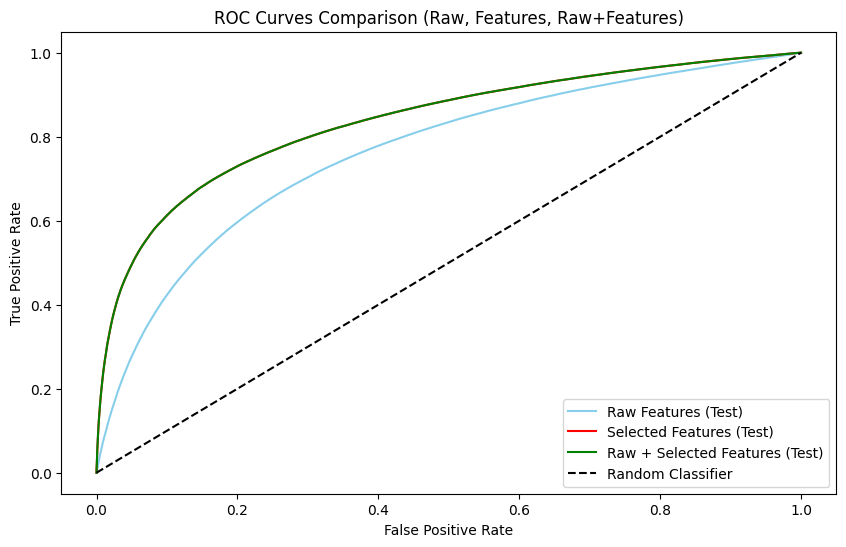

In [8]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import sklearn.discriminant_analysis as DA

Fisher=DA.LinearDiscriminantAnalysis()

X_Train_raw=Train_Sample[VarNames[1:4]]  
X_Test_raw = Test_Sample[VarNames[1:4]] 

Fisher.fit(X_Train_raw, y_Train)
y_train_pred_raw=Fisher.decision_function(X_Train_raw)
y_test_pred_raw=Fisher.decision_function(X_Test_raw)

X_Train_features=Train_Sample[["l_1_pT", "MET", "M_R"]]  
X_Test_features=Test_Sample[["l_1_pT", "MET", "M_R"]] 

Fisher.fit(X_Train_features, y_Train)
y_train_pred_features=Fisher.decision_function(X_Train_features)
y_test_pred_features=Fisher.decision_function(X_Test_features)

X_Train_combined=Train_Sample[VarNames[1:4] + ["l_1_pT", "MET", "M_R"]] 
X_Test_combined=Test_Sample[VarNames[1:4] + ["l_1_pT", "MET", "M_R"]]  

Fisher.fit(X_Train_combined, y_Train)
y_train_pred_combined = Fisher.decision_function(X_Train_combined)
y_test_pred_combined = Fisher.decision_function(X_Test_combined)

fpr_train_raw, tpr_train_raw, _=metrics.roc_curve(y_Train, y_train_pred_raw)
fpr_test_raw, tpr_test_raw, _=metrics.roc_curve(y_Test, y_test_pred_raw)

fpr_train_features, tpr_train_features, _=metrics.roc_curve(y_Train, y_train_pred_features)
fpr_test_features, tpr_test_features, _=metrics.roc_curve(y_Test, y_test_pred_features)

fpr_train_combined, tpr_train_combined, _=metrics.roc_curve(y_Train, y_train_pred_combined)
fpr_test_combined, tpr_test_combined, _=metrics.roc_curve(y_Test, y_test_pred_combined)

plt.figure(figsize=(10, 6))
plt.plot(fpr_test_raw, tpr_test_raw, label="Raw Features (Test)", color="skyblue")
plt.plot(fpr_test_features, tpr_test_features, label="Selected Features (Test)", color="red")
plt.plot(fpr_test_combined, tpr_test_combined, label="Raw + Selected Features (Test)", color="green")

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison (Raw, Features, Raw+Features)')
plt.legend(loc='lower right')
plt.show()


### Exercise 4: Comparing Techniques

#### Part a
Select 3 different classifiers from the techniques listed [here](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) to compare. Note that you can use the multi-layer perceptron to build a deep network, though training may be prohibitively slow. So avoid this technique.

#### Part b

Write a function that takes an instantiated classifier and performs the comparison from part 3b. Use the function on your choice of functions in part a.

#### Part c

Use the best method from part c to compute the maximal significance $\sigma_S= \frac{N_S}{\sqrt{N_S+N_B}}$ for the scenarios in lab 5.

In [9]:
# Part a 
# Linear Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df.iloc[:, 1:]  
y = df.iloc[:, 0]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()

lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

print("R^2 Score:", lr.score(X_test, y_test))

print("Mean Squared Error:", mean_squared_error(y_test, lr_pred))


R^2 Score: 0.2765178769998502
Mean Squared Error: 0.17956902446881373


In [10]:
# Logistic Regresion 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(max_iter=1000, random_state=42)

lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.788243


In [11]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.735126


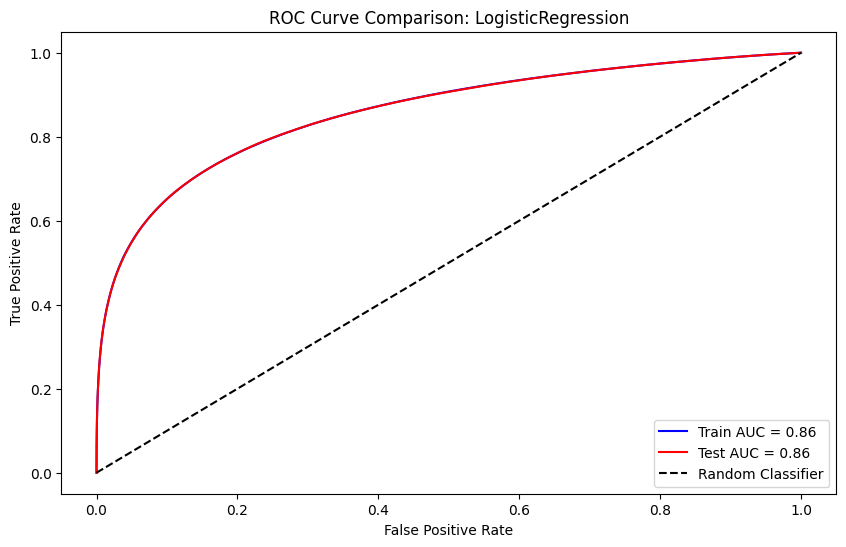

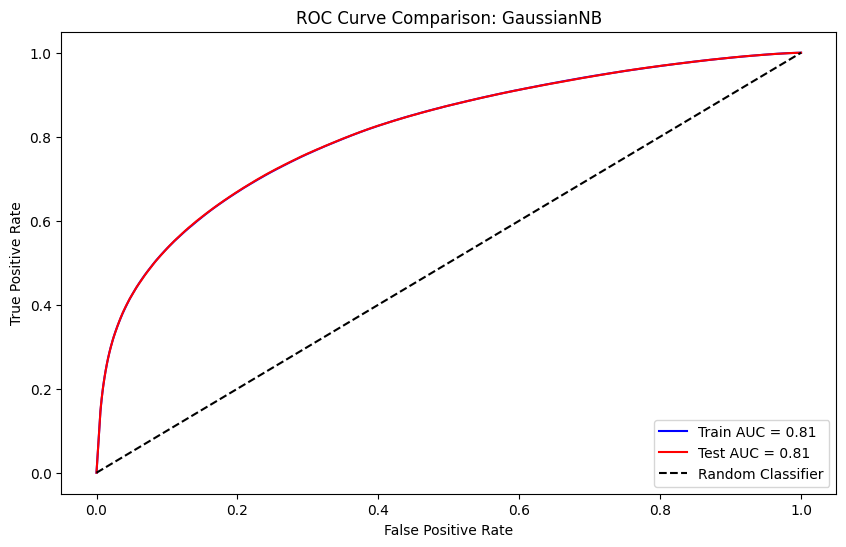

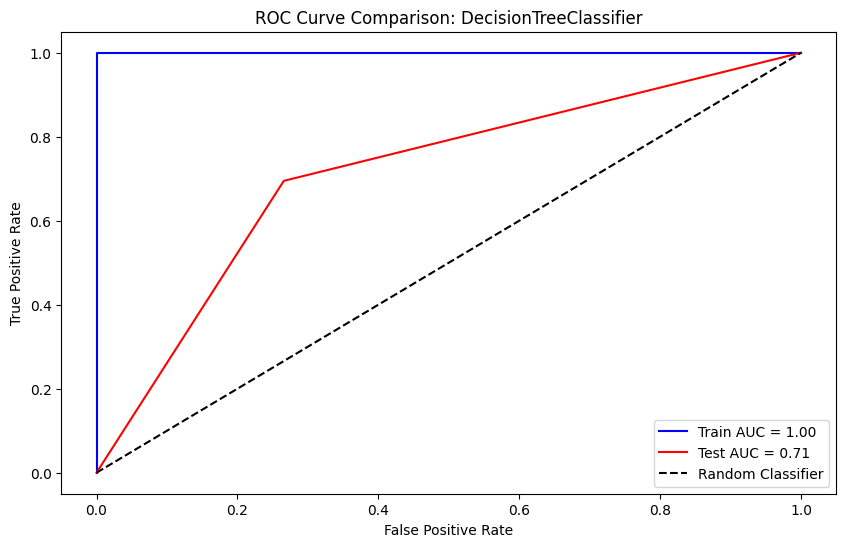

Logistic Regression Train AUC: 0.86, Test AUC: 0.86
Naive Bayes Train AUC: 0.81, Test AUC: 0.81
Decision Tree Train AUC: 1.00, Test AUC: 0.71


In [14]:
# b 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

def compare_classifier_performance(classifier, X_train, y_train, X_test, y_test):
    classifier.fit(X_train, y_train)
    
    if hasattr(classifier, 'predict_proba'):
        y_train_pred = classifier.predict_proba(X_train)[:, 1]
        y_test_pred = classifier.predict_proba(X_test)[:, 1]
    else:
        print(f"Warning: {classifier.__class__.__name__} does not support `predict_proba`. Using `predict` instead.")
        y_train_pred = classifier.predict(X_train)
        y_test_pred = classifier.predict(X_test)
    
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    roc_auc_train = auc(fpr_train, tpr_train)
    roc_auc_test = auc(fpr_test, tpr_test)

    plt.figure(figsize=(10, 6))
    plt.plot(fpr_train, tpr_train, color='blue', label=f'Train AUC = {roc_auc_train:.2f}')
    plt.plot(fpr_test, tpr_test, color='red', label=f'Test AUC = {roc_auc_test:.2f}')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve Comparison: {classifier.__class__.__name__}')
    plt.legend(loc='lower right')
    plt.show()

    return roc_auc_train, roc_auc_test

log_reg = LogisticRegression()
naive_bayes = GaussianNB()
decision_tree = DecisionTreeClassifier()

log_reg_train_auc, log_reg_test_auc = compare_classifier_performance(log_reg, X_train, y_train, X_test, y_test)
naive_bayes_train_auc, naive_bayes_test_auc = compare_classifier_performance(naive_bayes, X_train, y_train, X_test, y_test)
decision_tree_train_auc, decision_tree_test_auc = compare_classifier_performance(decision_tree, X_train, y_train, X_test, y_test)

print(f"Logistic Regression Train AUC: {log_reg_train_auc:.2f}, Test AUC: {log_reg_test_auc:.2f}")
print(f"Naive Bayes Train AUC: {naive_bayes_train_auc:.2f}, Test AUC: {naive_bayes_test_auc:.2f}")
print(f"Decision Tree Train AUC: {decision_tree_train_auc:.2f}, Test AUC: {decision_tree_test_auc:.2f}")



In [17]:
# c

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

N_S = np.sum(y_pred == 1) 
N_B = np.sum(y_pred == 0) 

sigma_S = N_S / np.sqrt(N_S + N_B)

print(f"Maximal Significance (sigma_S): {sigma_S}")


Maximal Significance (sigma_S): 373.103


### Exercise 5: Metrics

Scikit-learn provides methods for computing the FPR, TPR, ROC, AUC metrics. For example:

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


#### Part a
TPR/FPR/ROC/AUC are one way of assessing the quality of a classifier. Read about [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall), [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision), and [F-score](https://en.wikipedia.org/wiki/F-score).

#### Part b
Look through [model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html#) documentation. Using scikit-learns tools, compute TPR, FPR, ROC, AUC, Precision, Recall, F1 score, and accuracy for the method you selected in 4c above and each scenario. Make a nice table, which also includes the maximal significance. 


                 Metric       Score
0          TPR (Recall)    0.676301
1                   FPR    0.117322
2                   AUC    0.857589
3             Precision    0.829439
4                Recall    0.676301
5              F1 Score    0.745083
6              Accuracy    0.788243
7  Maximal Significance  373.103000


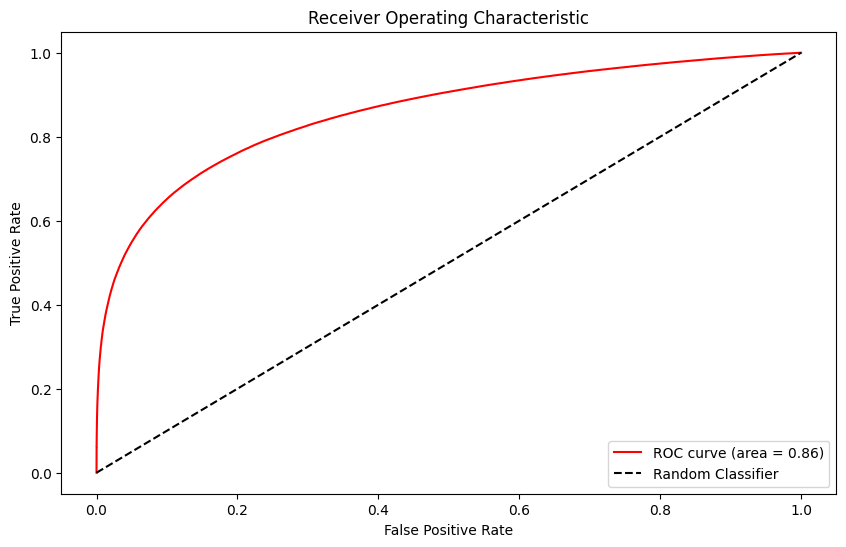

In [19]:
# b 

from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

y_pred = logreg.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

tpr = TP / (TP + FN) 
fpr = FP / (FP + TN) 

fpr_vals, tpr_vals, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
roc_auc = auc(fpr_vals, tpr_vals)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)

sigma_s = 373.103  

metrics_table = pd.DataFrame({
    'Metric': ['TPR (Recall)', 'FPR', 'AUC', 'Precision', 'Recall', 'F1 Score', 'Accuracy', 'Maximal Significance'],
    'Score': [tpr, fpr, roc_auc, precision, recall, f1, accuracy, sigma_s]
})

print(metrics_table)

plt.figure(figsize=(10, 6))
plt.plot(fpr_vals, tpr_vals, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()